<a href="https://colab.research.google.com/github/faisu6339-glitch/ML-Projects-/blob/main/P7_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Common ML libraries imported successfully!")

Common ML libraries imported successfully!


In [250]:
df=pd.read_csv("StudentsPerformance.csv")

In [251]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [252]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [253]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [254]:
df.duplicated().sum()


np.int64(0)

In [255]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [256]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [257]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [258]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [259]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [260]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [261]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [262]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [263]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [264]:
df.describe(include='object')


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [265]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(num_cols)


Numerical Columns:
Index(['math score', 'reading score', 'writing score'], dtype='object')


In [266]:
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(cat_cols)


Categorical Columns:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [267]:
num_cols = list(num_cols)
cat_cols = list(cat_cols)


In [268]:
num_cols

['math score', 'reading score', 'writing score']

In [269]:
cat_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [270]:
print("Number of Numerical Columns:", len(num_cols))
print("Number of Categorical Columns:", len(cat_cols))


Number of Numerical Columns: 3
Number of Categorical Columns: 5


Numerical Columns

In [271]:
num_cols = ['reading score', 'writing score']

In [272]:
num_cols

['reading score', 'writing score']

Binary/Ordinal Columns

In [273]:
binary_cols = ['gender', 'lunch', 'test preparation course']
ordinal_cols = ['parental level of education']
nominal_cols = ['race/ethnicity']


In [274]:
binary_cols

['gender', 'lunch', 'test preparation course']

In [275]:
ordinal_cols

['parental level of education']

In [276]:
nominal_cols

['race/ethnicity']

Define Order for Ordinal Feature

In [277]:
education_order = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]


In [278]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])
binary_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])
ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[education_order]))
])
nominal_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('binary_pipeline', binary_pipeline, binary_cols),
    ('ordinal_pipeline', ordinal_pipeline, ordinal_cols),
    ('nominal_pipeline', nominal_pipeline, nominal_cols)
])
X = df.drop('math score', axis=1)
y = df['math score']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [279]:
from sklearn.linear_model import LinearRegression

model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])


In [280]:
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['reading score',
                                                   'writing score']),
                                                 ('binary_pipeline',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['gender', 'lunch',
                                                   'test preparation course']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['some '
                                                                                               'high '
                                                                                               'school',
                                                                                               'high '
                                                                                               'school',
                                                                                               'some '
                                                                                               'college',
                                                                                               "associate's "
                                                                                               'degree',
                                                                                               "bachelor's "
                                                                                               'degree',
                                                                                               "master's "
                                                                                               'degree']]))]),
                                                  ['parental level of '
                                                   'education']),
                                                 ('nominal_pipeline',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['race/ethnicity'])])),
                ('model', LinearRegression())])

In [281]:
y_pred = model_pipeline.predict(X_test)


In [282]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.8815597679452446
MAE: 4.181966418321513


In [283]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 5.368524617046371


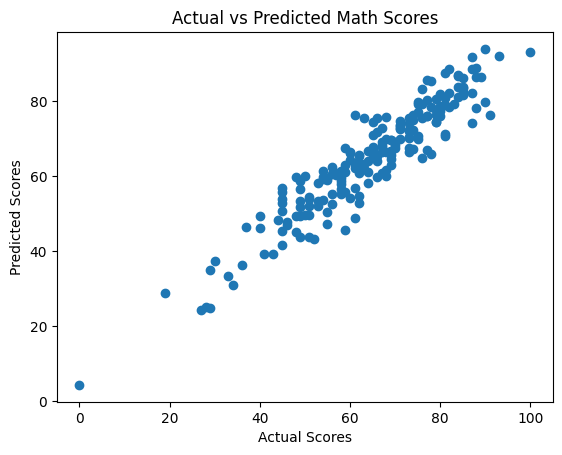

In [284]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()


In [285]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error


In [286]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}


In [287]:
results = []

for name, model in models.items():

    # Create full pipeline
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append([name, r2, mae])

    print(f"{name}")
    print("R2:", r2)
    print("MAE:", mae)
    print("-"*30)


Linear Regression
R2: 0.8815597679452446
MAE: 4.181966418321513
------------------------------
Ridge
R2: 0.881564937666813
MAE: 4.1830655157780265
------------------------------
Lasso
R2: 0.8825922528679434
MAE: 4.145887445054908
------------------------------


In [288]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE"])
results_df


,Model,R2 Score,MAE
0,Linear Regression,0.881560,4.181966
1,Ridge,0.881565,4.183066
2,Lasso,0.882592,4.145887


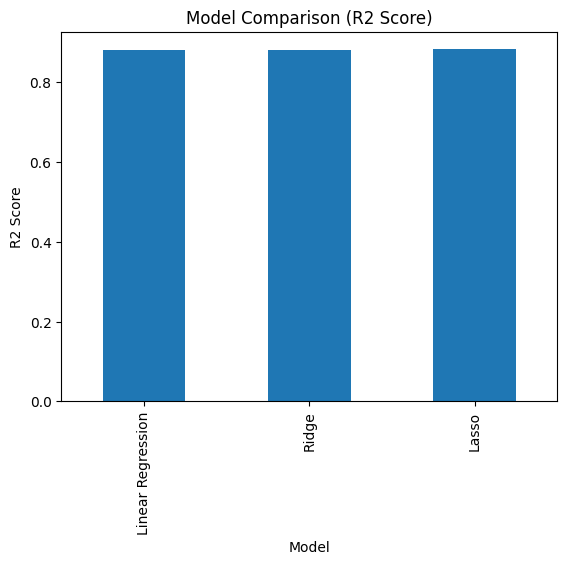

In [289]:
import matplotlib.pyplot as plt

results_df.set_index("Model")["R2 Score"].plot(kind='bar')
plt.title("Model Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.show()


In [290]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [291]:
df['gender']

,gender
0,female
1,female
2,female
3,male
4,male
...,...
995,female
996,male
997,female
998,female


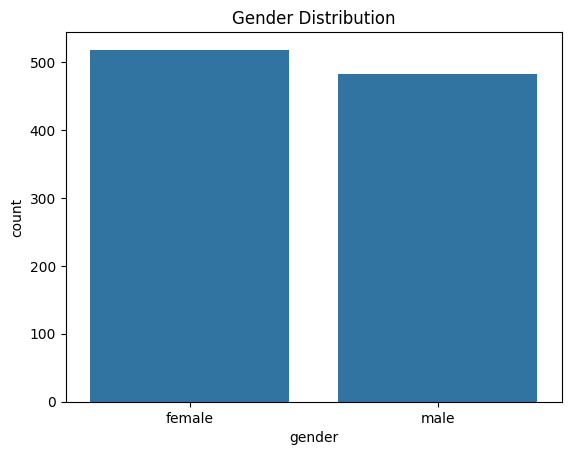

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

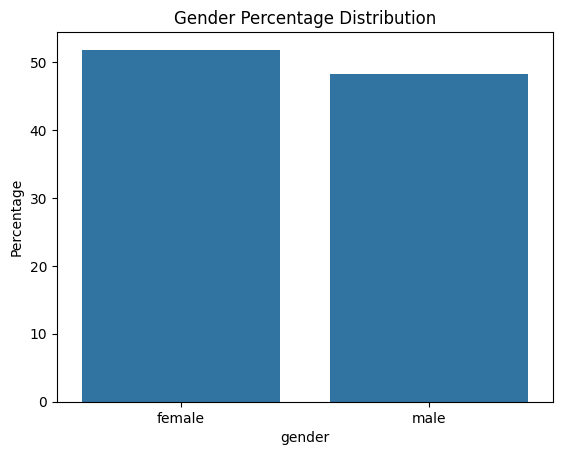

In [293]:
gender_percent = df['gender'].value_counts(normalize=True) * 100

sns.barplot(x=gender_percent.index, y=gender_percent.values)
plt.ylabel("Percentage")
plt.title("Gender Percentage Distribution")
plt.show()


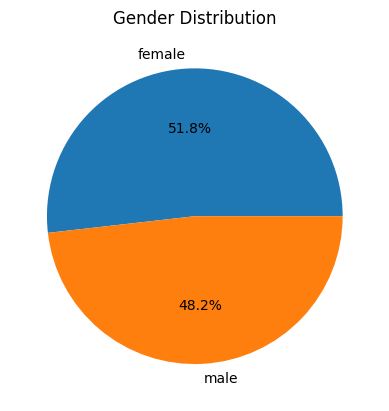

In [294]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


#Gender vs Scores visualization

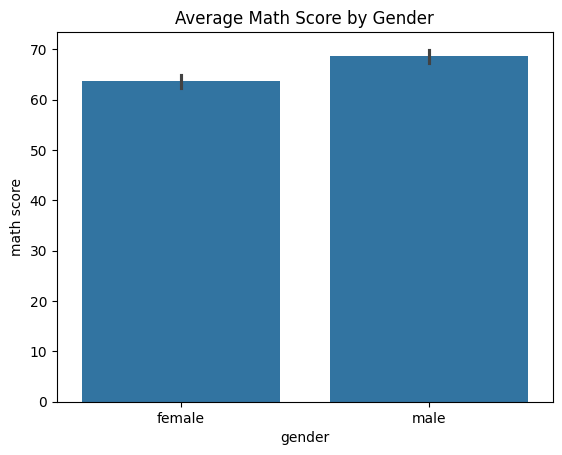

In [295]:
sns.barplot(x='gender', y='math score', data=df)
plt.title("Average Math Score by Gender")
plt.show()


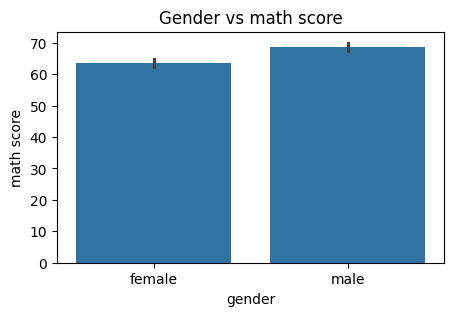

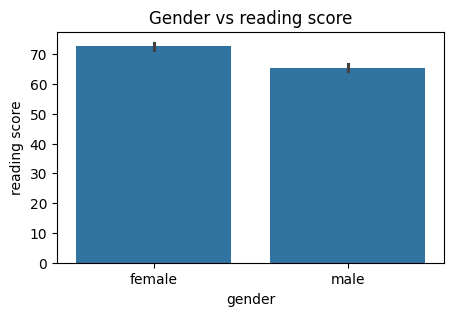

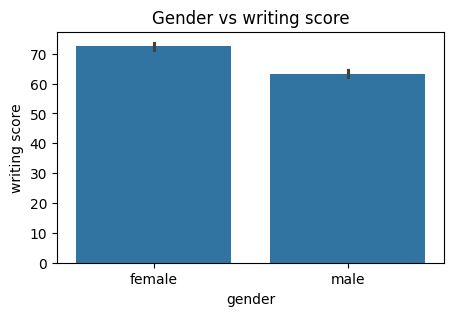

In [296]:
scores = ['math score', 'reading score', 'writing score']

for score in scores:
    plt.figure(figsize=(5,3))
    sns.barplot(x='gender', y=score, data=df)
    plt.title(f"Gender vs {score}")
    plt.show()


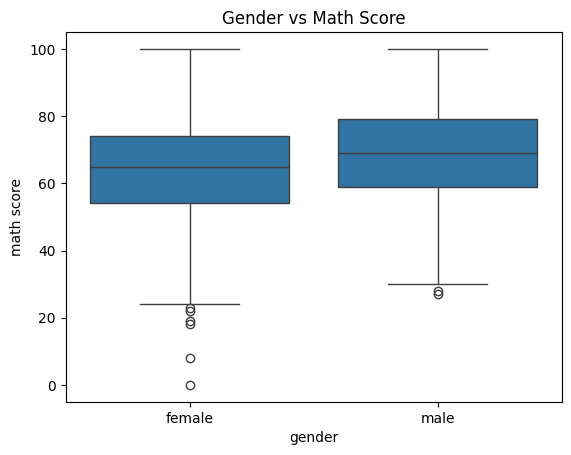

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='gender', y='math score', data=df)
plt.title("Gender vs Math Score")
plt.show()


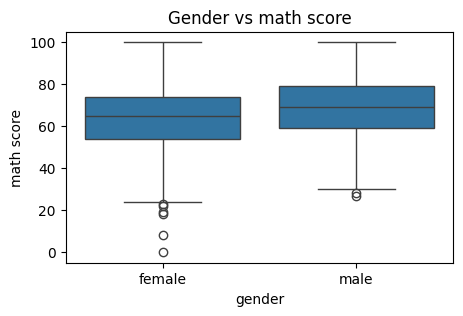

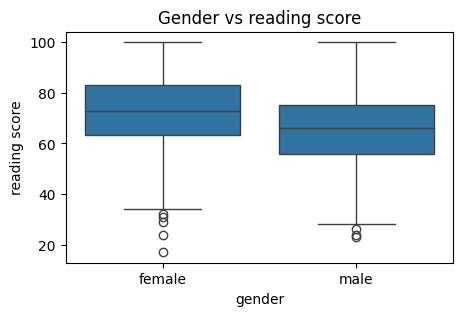

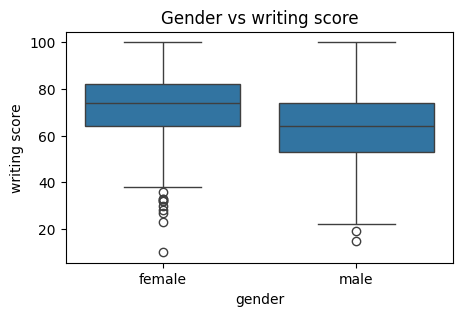

In [298]:
scores = ['math score', 'reading score', 'writing score']

for score in scores:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='gender', y=score, data=df)
    plt.title(f"Gender vs {score}")
    plt.show()


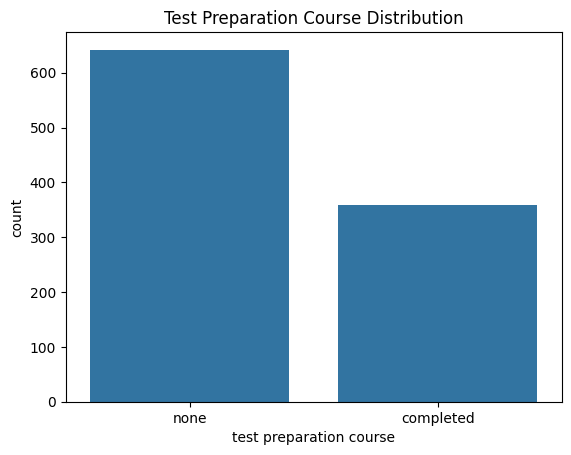

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='test preparation course', data=df)
plt.title("Test Preparation Course Distribution")
plt.show()


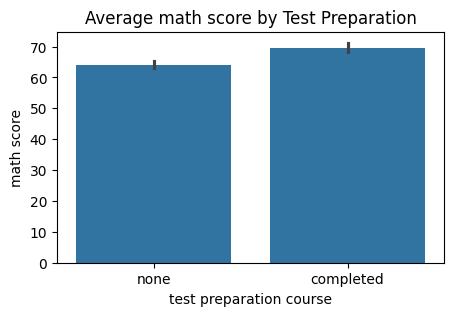

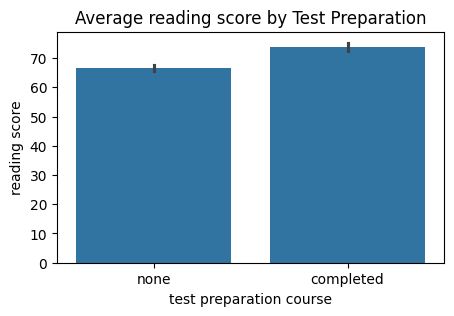

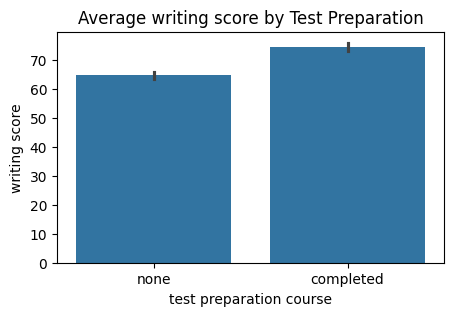

In [300]:
scores = ['math score', 'reading score', 'writing score']

for score in scores:
    plt.figure(figsize=(5,3))
    sns.barplot(x='test preparation course', y=score, data=df)
    plt.title(f"Average {score} by Test Preparation")
    plt.show()


In [301]:
num_cols = ['math score', 'reading score', 'writing score']


In [302]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"{column}")
    print("Lower bound:", lower_bound)
    print("Upper bound:", upper_bound)
    print("Number of outliers:", outliers.shape[0])
    print("-"*40)

    return outliers


In [303]:
for col in num_cols:
    detect_outliers_iqr(df, col)


math score
Lower bound: 27.0
Upper bound: 107.0
Number of outliers: 8
----------------------------------------
reading score
Lower bound: 29.0
Upper bound: 109.0
Number of outliers: 6
----------------------------------------
writing score
Lower bound: 25.875
Upper bound: 110.875
Number of outliers: 5
----------------------------------------


In [304]:
math_outliers = detect_outliers_iqr(df, 'math score')
math_outliers.head()


math score
Lower bound: 27.0
Upper bound: 107.0
Number of outliers: 8
----------------------------------------


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38


In [305]:
outlier_indices = set()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    indices = df[(df[col] < lower) | (df[col] > upper)].index
    outlier_indices.update(indices)

print("Total rows with outliers:", len(outlier_indices))


Total rows with outliers: 12


In [306]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df[num_cols]))
outliers = (z_scores > 3).any(axis=1)

print("Outliers using Z-score:", np.sum(outliers))


Outliers using Z-score: 7


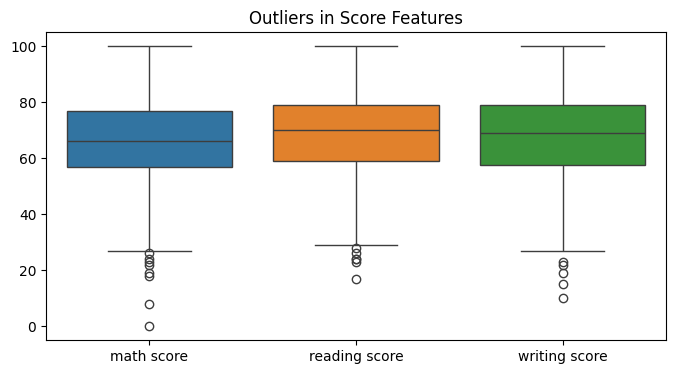

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['math score', 'reading score', 'writing score']

plt.figure(figsize=(8,4))
sns.boxplot(data=df[num_cols])
plt.title("Outliers in Score Features")
plt.show()


In [309]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

final_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])


In [310]:
final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['reading score',
                                                   'writing score']),
                                                 ('binary_pipeline',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['gender', 'lunch',
                                                   'test preparation course']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['some '
                                                                                               'high '
                                                                                               'school',
                                                                                               'high '
                                                                                               'school',
                                                                                               'some '
                                                                                               'college',
                                                                                               "associate's "
                                                                                               'degree',
                                                                                               "bachelor's "
                                                                                               'degree',
                                                                                               "master's "
                                                                                               'degree']]))]),
                                                  ['parental level of '
                                                   'education']),
                                                 ('nominal_pipeline',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['race/ethnicity'])])),
                ('model', LinearRegression())])

In [311]:
import pandas as pd

new_student = pd.DataFrame({
    'gender': ['female'],
    'race/ethnicity': ['group C'],
    'parental level of education': ["bachelor's degree"],
    'lunch': ['standard'],
    'test preparation course': ['completed'],
    'reading score': [85],
    'writing score': [88]
})


In [312]:
predicted_score = final_pipeline.predict(new_student)

print("Predicted Math Score:", predicted_score[0])


Predicted Math Score: 75.31572158794384
